In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
path=r"C:\Users\HP\churn pipeline\train_data\WA_Fn-UseC_-Telco-Customer-Churn.csv"
data=pd.read_csv(path)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
non_unique = data["customerID"].duplicated(keep=False)
non_unique.unique() #no repeated columns

array([False])

In [5]:
every_columns=data.columns
data["OnlineBackup"] #catigorical variable
every_columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
categorical_data=pd.concat([data["gender"],data["SeniorCitizen"],data["Partner"],
             data["Dependents"],data["tenure"],data["PhoneService"],data["MultipleLines"],data["InternetService"],
             data["OnlineSecurity"],data["OnlineBackup"],data['DeviceProtection'],data['TechSupport'],data['StreamingTV'], 
             data["StreamingMovies"],data["Contract"],data["PaperlessBilling"],data['PaymentMethod'],data['Churn']]
                         ,axis=1).astype('category', copy=False)
categorical_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_data = categorical_data.apply(lambda col: le.fit_transform(col))
encoded_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,1


In [8]:
concat_data=pd.concat([data['MonthlyCharges'],data['TotalCharges']],axis=1)
filltered_data=pd.concat([concat_data,encoded_data],axis=1)
filltered_data.isnull().sum()

MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [9]:
for col in filltered_data.columns:
    num_spaces = (filltered_data[col] == ' ').sum()
    num_empty = (filltered_data[col] == '').sum()
    if num_spaces > 0 or num_empty > 0:
        print(f"Column '{col}' has {num_spaces} spaces and {num_empty} empty strings")

Column 'TotalCharges' has 11 spaces and 0 empty strings


In [10]:
mask = filltered_data.applymap(lambda x: isinstance(x, str) and x.strip() == '')
filltered_data = filltered_data[~mask.any(axis=1)]

In [11]:
filltered_data

,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,29.85,29.85,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,56.95,1889.5,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,53.85,108.15,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,42.30,1840.75,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,70.70,151.65,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.5,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,103.20,7362.9,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,29.60,346.45,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,74.40,306.6,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,1


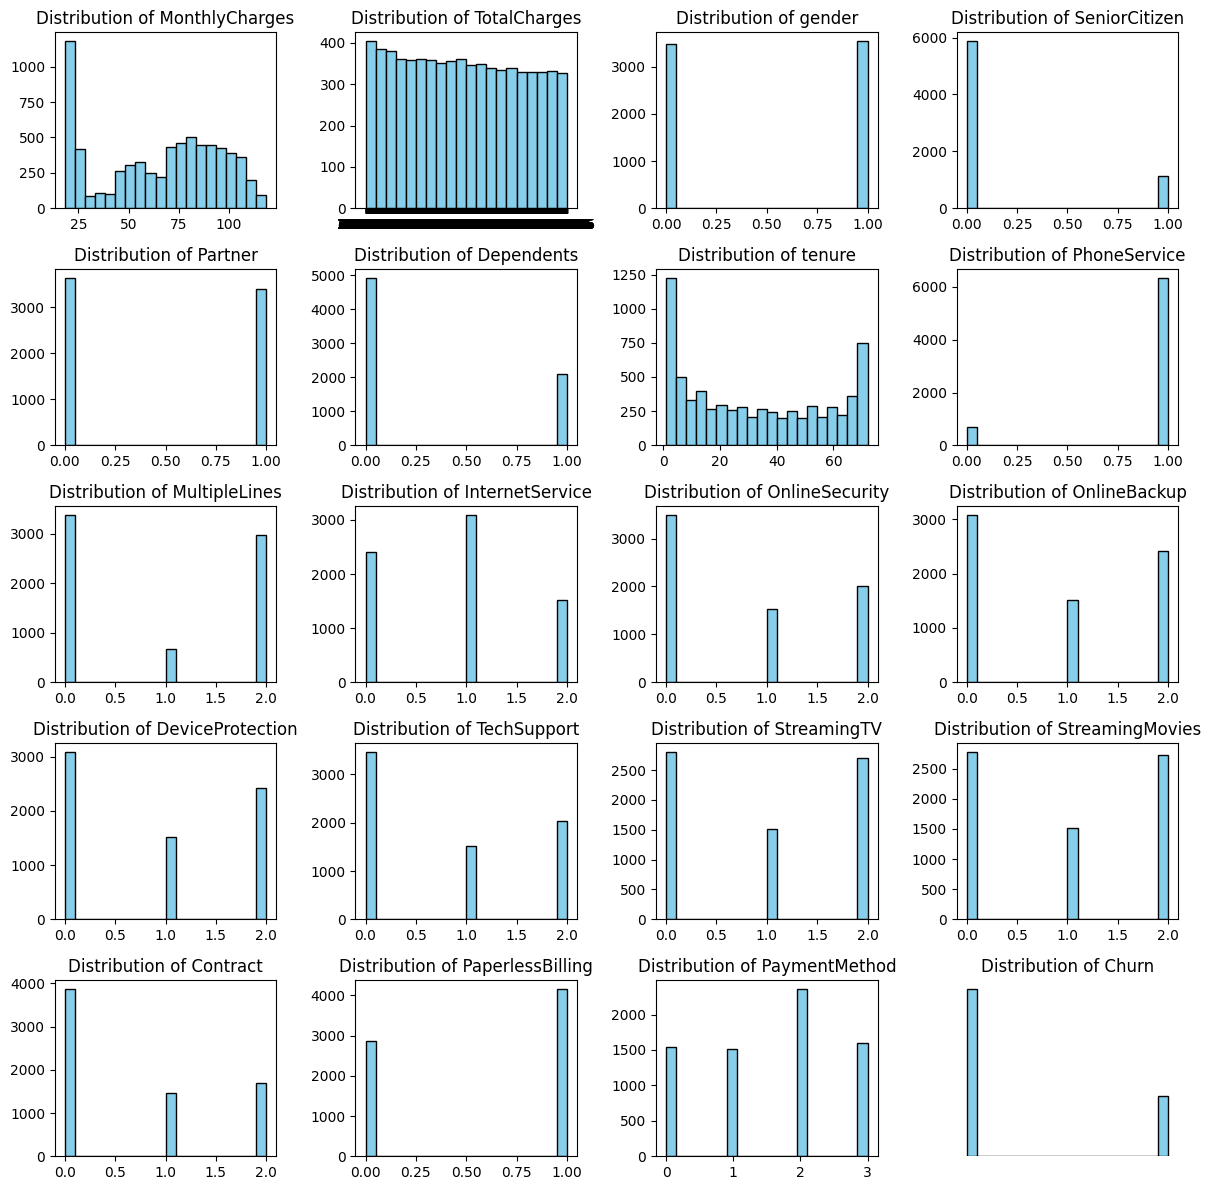

In [12]:
fig,ax=plt.subplots(5,4,figsize=(12,12)) #filltered_data
counts=0
l=[]
for j in range(5):
    for c in range(4):
        
        col = filltered_data.columns[counts]
        ax[j][c].hist(filltered_data[col], bins=20, color='skyblue', edgecolor='black')
        ax[j][c].set_title(f'Distribution of {col}')
        counts += 1

ax[j][c].axis('off')
plt.tight_layout()
plt.show()

In [13]:
filltered_data

,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,29.85,29.85,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,56.95,1889.5,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,53.85,108.15,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,42.30,1840.75,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,70.70,151.65,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.5,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,103.20,7362.9,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,29.60,346.45,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,74.40,306.6,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,1


In [14]:
corr_matrix = filltered_data.corr(method='spearman')
corr_matrix

,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
MonthlyCharges,1.000000,0.638032,-0.013085,0.220737,0.109456,-0.105449,0.275339,0.240266,0.464512,-0.205400,-0.108205,0.112076,0.159398,-0.055989,0.372249,0.372493,-0.047260,0.345805,-0.205721,0.184167
TotalCharges,0.638032,1.000000,-0.001177,0.107248,0.343196,0.082890,0.889177,0.084910,0.461432,-0.188878,0.210292,0.334821,0.352778,0.227189,0.363454,0.370288,0.467410,0.153934,-0.376645,-0.232190
gender,-0.013085,-0.001177,1.000000,-0.001819,-0.001379,0.010349,0.003718,-0.007515,-0.006778,-0.002871,-0.014305,-0.011717,0.001520,-0.006234,-0.005596,-0.008907,0.001037,-0.011902,0.016683,-0.008545
SeniorCitizen,0.220737,0.107248,-0.001819,1.000000,0.016957,-0.210550,0.017408,0.008392,0.146074,-0.016791,-0.141100,-0.019907,-0.027794,-0.163475,0.029965,0.046592,-0.143143,0.156258,-0.043213,0.150541
Partner,0.109456,0.343196,-0.001379,0.016957,1.000000,0.452269,0.387972,0.018397,0.142337,0.000580,0.148505,0.152625,0.165141,0.124837,0.136668,0.129904,0.295210,-0.013957,-0.156742,-0.149982
Dependents,-0.105449,0.082890,0.010349,-0.210550,0.452269,1.000000,0.169018,-0.001078,-0.024944,0.033887,0.160428,0.094985,0.084602,0.141751,0.047008,0.022464,0.241624,-0.110131,-0.039441,-0.163128
tenure,0.275339,0.889177,0.003718,0.017408,0.387972,0.169018,1.000000,0.007734,0.349433,-0.028027,0.321273,0.369691,0.373009,0.320025,0.295362,0.301456,0.673986,0.005955,-0.378933,-0.369659
PhoneService,0.240266,0.084910,-0.007515,0.008392,0.018397,-0.001078,0.007734,1.000000,-0.037373,0.400211,0.000089,0.030178,0.011039,-0.004335,0.057379,0.043492,0.002543,0.016696,-0.005148,0.011691
MultipleLines,0.464512,0.461432,-0.006778,0.146074,0.142337,-0.024944,0.349433,-0.037373,1.000000,-0.097235,-0.015125,0.106544,0.111965,-0.010682,0.172764,0.180137,0.107194,0.164944,-0.182467,0.037827
InternetService,-0.205400,-0.188878,-0.002871,-0.016791,0.000580,0.033887,-0.028027,0.400211,-0.097235,1.000000,0.020605,0.061664,0.071606,0.021355,0.120036,0.107160,0.079390,-0.117444,0.083030,-0.028472


<Axes: xlabel='Churn', ylabel='count'>

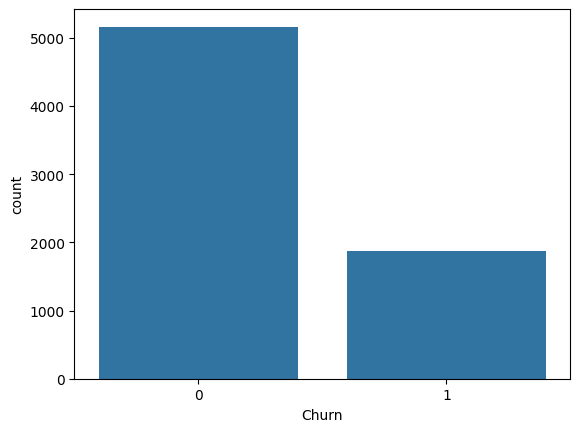

In [15]:
sns.countplot(data=filltered_data,x="Churn")

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

iso_forest = IsolationForest(contamination=0.1)
iso_pred = iso_forest.fit_predict(filltered_data)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_pred = lof.fit_predict(filltered_data)

# One-Class SVM
ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
ocsvm.fit(filltered_data)
svm_pred = ocsvm.predict(filltered_data)

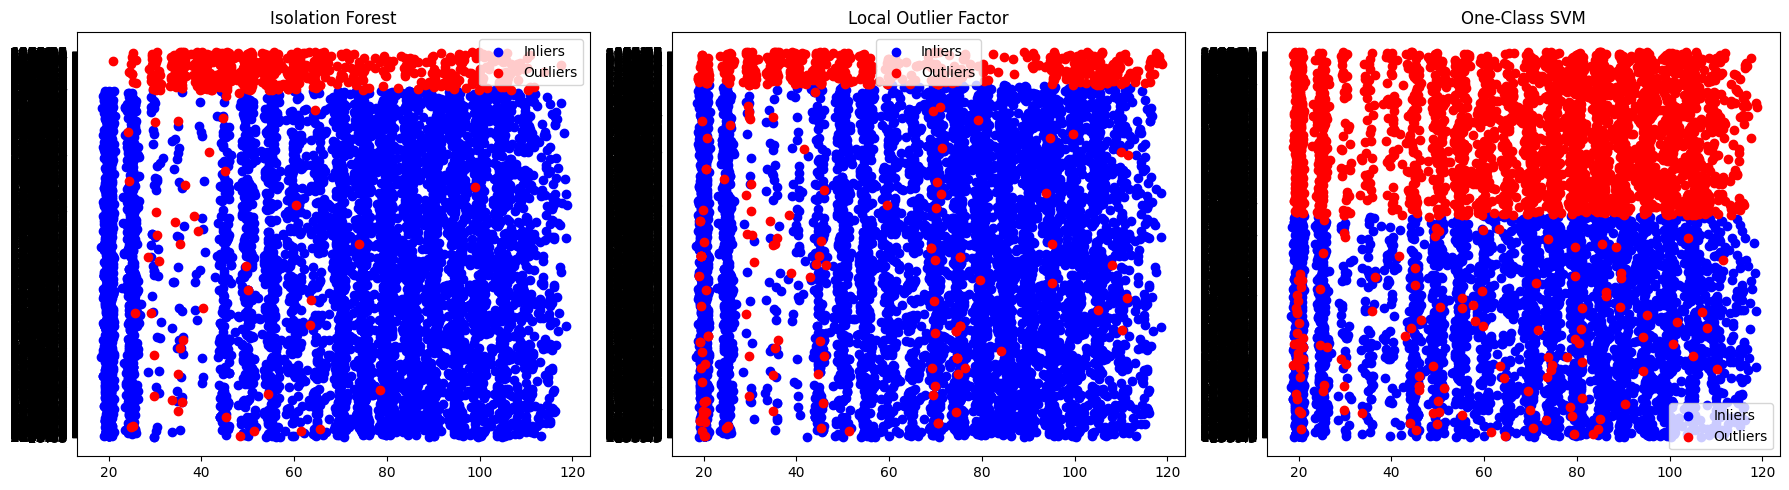

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

methods = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM']
predictions = [iso_pred, lof_pred, svm_pred]

for i, ax in enumerate(axs):
    
    ax.set_title(methods[i])
    inliers = filltered_data[predictions[i] == 1]
    outliers = filltered_data[predictions[i] == -1]
    
    ax.scatter(inliers.iloc[:, 0], inliers.iloc[:, 1], c='blue', label='Inliers')
    ax.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], c='red', label='Outliers')
    ax.legend()

plt.tight_layout()
plt.show()

In [18]:
mask = iso_pred == 1
X_cleaned = filltered_data[mask]
X_cleaned 

,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,29.85,29.85,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,56.95,1889.5,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,53.85,108.15,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
4,70.70,151.65,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1
5,99.65,820.5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.5,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,103.20,7362.9,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,29.60,346.45,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,74.40,306.6,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,1


In [19]:
from imblearn.over_sampling import SMOTE

y=X_cleaned["Churn"]
x=X_cleaned.drop("Churn",axis=1)

X_resampled,y_resampled =SMOTE().fit_resample(x, y)

<Axes: xlabel='Churn', ylabel='count'>

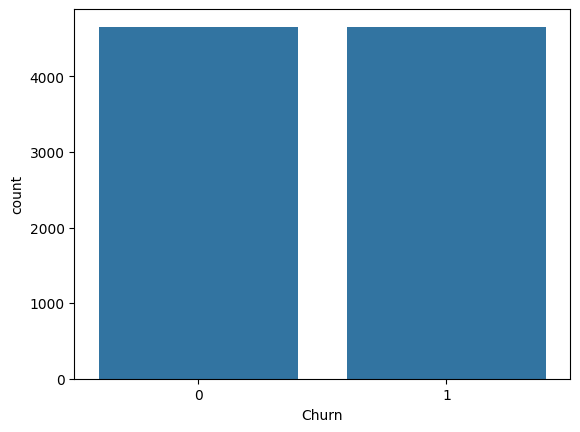

In [20]:
df=pd.DataFrame(y_resampled)
sns.countplot(data=df,x="Churn")

In [21]:
X_resampled.shape,y_resampled.shape

((9312, 19), (9312,))

In [31]:
y_resampled=pd.DataFrame(y_resampled)
proced_data=pd.concat([X_resampled,y_resampled])

In [41]:
import os

save_dir = '../data/processed'
save_path = os.path.join(save_dir,'processed_data.csv')

os.makedirs(save_dir, exist_ok=True)
proced_data.to_csv(save_path, index=False)